In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [3]:
df=pd.read_csv('Bike_Rental_data(in).csv')

# Convert float columns explicitly
float_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
for col in float_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.shape)
print(df.head())

(100576, 17)
    instant    dteday    season    yr mnth        hr holiday   weekday  \
0  0.992410  1/1/2011  springer  2011    1 -0.009452      No  5.990616   
1  2.004157  1/1/2011  springer  2011    1  1.007925      No  5.996162   
2  2.984610  1/1/2011  springer  2011    1  1.993083      No  6.004768   
3  3.993251  1/1/2011  springer  2011    1  2.991451      No  5.980473   
4  4.990763  1/1/2011  springer  2011    1  4.024688      No  5.984412   

  workingday weathersit  temp   atemp   hum  windspeed casual registered  \
0    No work      Clear  0.24  0.2879  0.81        0.0      3         13   
1    No work      Clear  0.22  0.2727  0.80        0.0      8         32   
2    No work      Clear  0.22  0.2727   NaN        0.0      5         27   
3    No work      Clear  0.24  0.2879  0.75        0.0      3         10   
4    No work      Clear  0.24  0.2879  0.75        0.0      0          1   

         cnt  
0  15.999019  
1  40.004970  
2  32.004786  
3  12.999856  
4   1.0020

C:\Users\hares\AppData\Local\Temp\ipykernel_25040\1113270668.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Bike_Rental_data(in).csv')


In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100576 entries, 0 to 100575
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   instant     100576 non-null  float64
 1   dteday      100576 non-null  object 
 2   season      100576 non-null  object 
 3   yr          100576 non-null  object 
 4   mnth        100576 non-null  object 
 5   hr          100576 non-null  float64
 6   holiday     100576 non-null  object 
 7   weekday     100576 non-null  float64
 8   workingday  100576 non-null  object 
 9   weathersit  100576 non-null  object 
 10  temp        100509 non-null  float64
 11  atemp       100534 non-null  float64
 12  hum         100539 non-null  float64
 13  windspeed   100546 non-null  float64
 14  casual      100576 non-null  object 
 15  registered  100576 non-null  object 
 16  cnt         100576 non-null  float64
dtypes: float64(8), object(9)
memory usage: 13.0+ MB
None


In [5]:
print(df.iloc[15:17,2:4])


      season    yr
15         ?  2011
16  springer  2011


In [6]:
# Check for missing values represented as '?'
print("Missing values represented as '?':")
for col in df.columns:
    count = (df[col] == '?').sum()
    if count > 0:
        print(f"{col}: {count}")

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Now check for actual missing values
print("\nMissing values after replacement:")
print(df.isnull().sum())


Missing values represented as '?':
season: 33
yr: 5
mnth: 5
holiday: 7
workingday: 28
weathersit: 22
casual: 7
registered: 7

Missing values after replacement:
instant        0
dteday         0
season        33
yr             5
mnth           5
hr             0
holiday        7
weekday        0
workingday    28
weathersit    22
temp          67
atemp         42
hum           37
windspeed     30
casual         7
registered     7
cnt            0
dtype: int64


In [7]:
# Handle missing values 

# Check percentage of missing values
print("Percentage of missing values:")
missing_pct = (df.isnull().sum() / len(df)) * 100
print(missing_pct[missing_pct > 0].sort_values(ascending=False))

# Strategy: Since all columns have < 1% missing, we can use imputation
# For numeric columns, use median (more robust than mean)
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, use mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Verify no missing values remain
print("\nMissing values after imputation:")
print(df.isnull().sum().sum())
print("✓ All missing values handled!")


Percentage of missing values:
temp          0.066616
atemp         0.041759
hum           0.036788
season        0.032811
windspeed     0.029828
workingday    0.027840
weathersit    0.021874
holiday       0.006960
casual        0.006960
registered    0.006960
mnth          0.004971
yr            0.004971
dtype: float64

Missing values after imputation:
0
✓ All missing values handled!


C:\Users\hares\AppData\Local\Temp\ipykernel_25040\1178177090.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\hares\AppData\Local\Temp\ipykernel_25040\1178177090.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [8]:
#remove outliers
initial_shape = df.shape
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
print(f"\nData shape before outlier removal: {initial_shape}")
print(f"Data shape after outlier removal: {df.shape}")


Data shape before outlier removal: (100576, 17)
Data shape after outlier removal: (95696, 17)


In [9]:
df['dteday'] = pd.to_datetime(df['dteday'], format='mixed', dayfirst=True)
df['day_of_year'] = df['dteday'].dt.dayofyear
df['month'] = df['dteday'].dt.month



In [10]:
df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)   
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns


df[categorical_cols] = df[categorical_cols].astype(str)




In [11]:
#print all numerical cols
print("\nNumerical columns:")
print(df.select_dtypes(include=[np.number]).columns.tolist())
#print all categorical cols
print("\nCategorical columns:")
print(df.select_dtypes(include=['object']).columns.tolist())



Numerical columns:
['hr', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day_of_year', 'month']

Categorical columns:
['season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit']


In [12]:
colu=[]
for i in numeric_cols:
    colu.append(i)
for j in categorical_cols:
    colu.append(j)
print(colu)

['hr', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day_of_year', 'month', 'season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit']


In [13]:
print(df.head())

     season    yr mnth        hr holiday   weekday workingday weathersit  \
0  springer  2011    1 -0.009452      No  5.990616    No work      Clear   
1  springer  2011    1  1.007925      No  5.996162    No work      Clear   
2  springer  2011    1  1.993083      No  6.004768    No work      Clear   
3  springer  2011    1  2.991451      No  5.980473    No work      Clear   
4  springer  2011    1  4.024688      No  5.984412    No work      Clear   

   temp   atemp   hum  windspeed        cnt  day_of_year  month  
0  0.24  0.2879  0.81        0.0  15.999019            1      1  
1  0.22  0.2727  0.80        0.0  40.004970            1      1  
2  0.22  0.2727  0.63        0.0  32.004786            1      1  
3  0.24  0.2879  0.75        0.0  12.999856            1      1  
4  0.24  0.2879  0.75        0.0   1.002089            1      1  


In [14]:
# encode only selected categorical columns
from sklearn.preprocessing import OneHotEncoder

# columns to encode
encode_cols = ['season', 'holiday', 'workingday', 'weathersit']

# keep other numeric/continuous columns (and exclude target)
num_cols = [c for c in df.columns if c not in encode_cols + ['cnt']]

# one-hot encode selected columns
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded = ohe.fit_transform(df[encode_cols])
encoded_cols = ohe.get_feature_names_out(encode_cols)

# build feature dataframe
df1 = pd.concat([
    pd.DataFrame(encoded, columns=encoded_cols, index=df.index),
    df[num_cols]
], axis=1)

# feature matrix and target
X = df1.values
y = df['cnt'].values

print("Encoded columns:", list(encoded_cols))
print("df1 shape:", df1.shape)
print(df1.head())


Encoded columns: ['season_springer', 'season_summer', 'season_winter', 'holiday_Yes', 'workingday_Working Day', 'weathersit_Heavy Rain', 'weathersit_Light Snow', 'weathersit_Mist']
df1 shape: (95696, 18)
   season_springer  season_summer  season_winter  holiday_Yes  \
0              1.0            0.0            0.0          0.0   
1              1.0            0.0            0.0          0.0   
2              1.0            0.0            0.0          0.0   
3              1.0            0.0            0.0          0.0   
4              1.0            0.0            0.0          0.0   

   workingday_Working Day  weathersit_Heavy Rain  weathersit_Light Snow  \
0                     0.0                    0.0                    0.0   
1                     0.0                    0.0                    0.0   
2                     0.0                    0.0                    0.0   
3                     0.0                    0.0                    0.0   
4                     0.0     

In [15]:
# find correlation of each feature in df1 with the target 'cnt'
feature_target_corr = df1.corrwith(df['cnt'])
print((feature_target_corr))



season_springer          -0.237587
season_summer             0.060777
season_winter             0.026822
holiday_Yes              -0.021062
workingday_Working Day   -0.002847
weathersit_Heavy Rain    -0.007953
weathersit_Light Snow    -0.125581
weathersit_Mist          -0.042421
yr                        0.190107
mnth                      0.114268
hr                        0.422780
weekday                   0.026910
temp                      0.401499
atemp                     0.399001
hum                      -0.339888
windspeed                 0.115524
day_of_year               0.113150
month                     0.114256
dtype: float64


In [16]:
#input colums with more than 0.75 co relation
more_corr_cols = feature_target_corr[feature_target_corr.abs() > 0.75].index.tolist()
print("\nColumns with correlation > 0.75 with target 'cnt':")
print(more_corr_cols)

    


Columns with correlation > 0.75 with target 'cnt':
[]


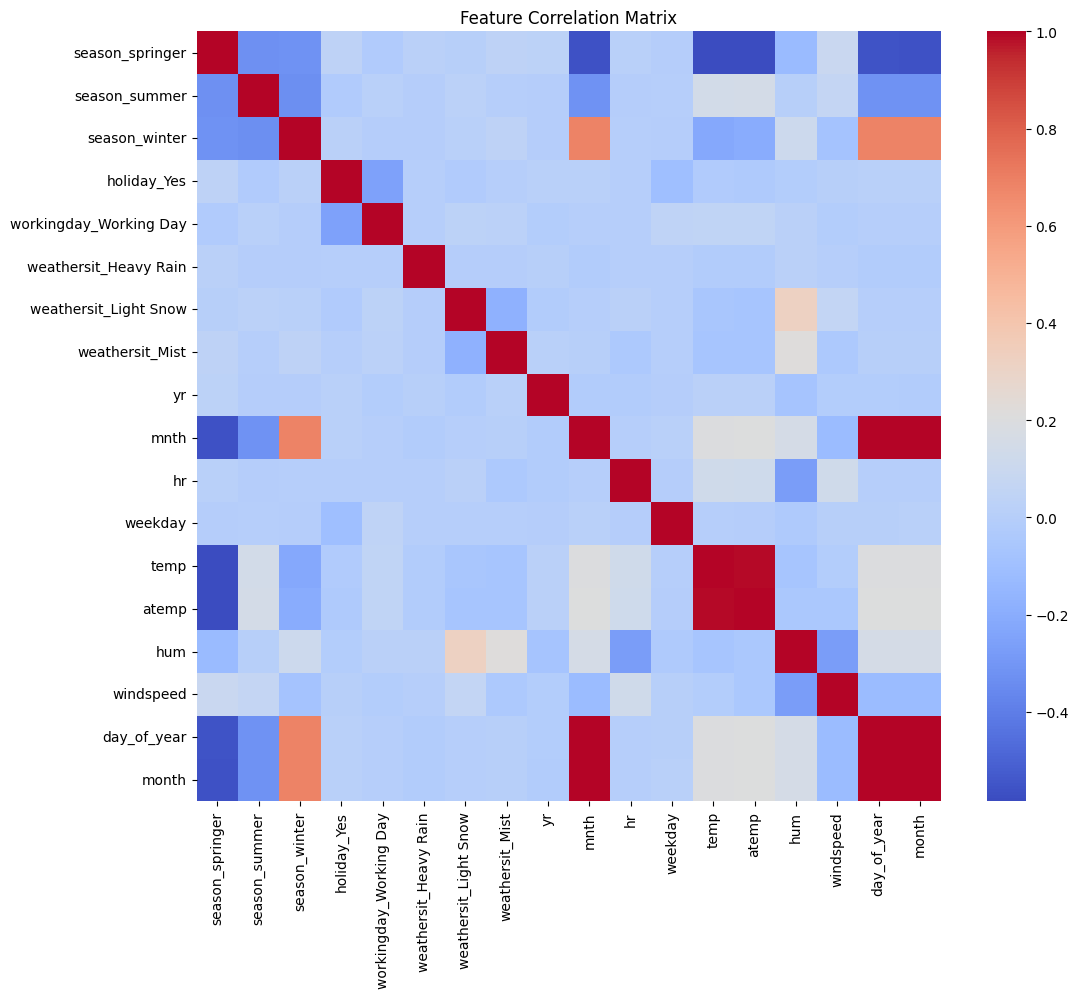

In [17]:
#co relation between features
import seaborn as sns
corr_matrix = df1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [18]:
#pairs with more than 0.75 co relation
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.75:
            pair = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
            high_corr_pairs.append(pair)    
print("\nFeature pairs with correlation > 0.75:")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")
        


Feature pairs with correlation > 0.75:
atemp and temp: 0.99
day_of_year and mnth: 1.00
month and mnth: 1.00
month and day_of_year: 1.00


In [19]:
#splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
#linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
# --- IGNORE ---



In [21]:
#metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# --- IGNORE ---
print(f"\nMean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 14376.74
R^2 Score: 0.40


In [22]:
#r2 score for training data
r2_train = r2_score(y_train, linear_model.predict(X_train))
# --- IGNORE ---
print(f"R^2 Score (Train): {r2_train:.2f}")

R^2 Score (Train): 0.41
